In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


LOAD THE DATASET

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
# Select the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [10]:
# Determine the optimal number of clusters (K) using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


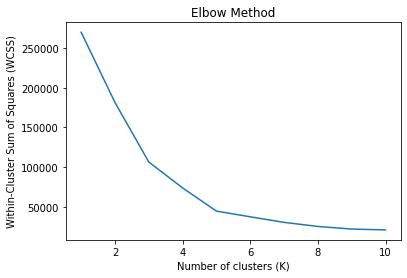

In [11]:
# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [12]:
# Based on the Elbow Method, set the optimal K value
k = 5  # You can choose the K value based on the plot elbow point

# Fit K-means with the selected number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X)

In [13]:
# Add the cluster labels back to the DataFrame
data['Cluster'] = clusters



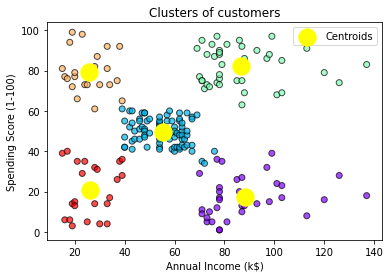

In [14]:
# Scatter plot with different clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow', alpha=0.7, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [16]:
# Display cluster statistics
cluster_statistics = data.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer Count'})
print(cluster_statistics)

         Annual Income (k$)  Spending Score (1-100)  Customer Count
Cluster                                                            
0                 88.200000               17.114286              35
1                 55.296296               49.518519              81
2                 86.538462               82.128205              39
3                 25.727273               79.363636              22
4                 26.304348               20.913043              23


The cluster statistics help us understand how the customers are grouped into different segments based on their income and spending behavior at the mall. Each segment represents a unique group of customers with similar characteristics.

The statistics tell us:

Average Income: On average, customers in each segment earn a certain amount of money annually.

Average Spending Score: On average, customers in each segment tend to spend a certain amount at the mall.

Number of Customers: The number of customers in each segment indicates the size of that group.

Using this information, businesses can make more informed decisions about how to tailor their marketing and services to meet the needs and preferences of each customer segment. For example, they can identify high-income customers with high spending scores and design targeted marketing campaigns to retain them. Additionally, businesses can focus on engaging and attracting customers with lower incomes by offering more affordable products and services.

Overall, the cluster statistics simplify the understanding of different customer groups, allowing businesses to create more effective strategies to enhance customer satisfaction and increase revenue.







